In [ ]:
# Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset 
# (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses 
# in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
# The objective is to predict the value of prices of the house using the given features.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#Load the Boston Housing Data Set from sklearn.datasets and print it

dataset=pd.read_csv("boston_housing.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

<AxesSubplot:>

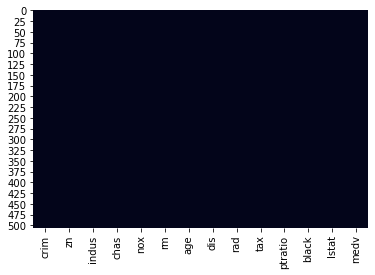

In [57]:
import seaborn as sns
sns.heatmap(dataset.isnull(), cbar=False)

In [58]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [59]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:])
X[:,1:]=imputer.transform(X[:,1:])
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [61]:
print(X_train)

[[3.5809e-01 0.0000e+00 6.2000e+00 ... 1.7400e+01 3.9170e+02 9.7100e+00]
 [1.5876e-01 0.0000e+00 1.0810e+01 ... 1.9200e+01 3.7694e+02 9.8800e+00]
 [1.1329e-01 3.0000e+01 4.9300e+00 ... 1.6600e+01 3.9125e+02 1.1380e+01]
 ...
 [1.5098e-01 0.0000e+00 1.0010e+01 ... 1.7800e+01 3.9451e+02 1.0300e+01]
 [2.2927e-01 0.0000e+00 6.9100e+00 ... 1.7900e+01 3.9274e+02 1.8800e+01]
 [1.3914e-01 0.0000e+00 4.0500e+00 ... 1.6600e+01 3.9690e+02 1.4690e+01]]


In [62]:
print(X_test)

[[6.7240e-02 0.0000e+00 3.2400e+00 ... 1.6900e+01 3.7521e+02 7.3400e+00]
 [9.2323e+00 0.0000e+00 1.8100e+01 ... 2.0200e+01 3.6615e+02 9.5300e+00]
 [1.1425e-01 0.0000e+00 1.3890e+01 ... 1.6400e+01 3.9374e+02 1.0500e+01]
 ...
 [1.4932e-01 2.5000e+01 5.1300e+00 ... 1.9700e+01 3.9511e+02 1.3150e+01]
 [1.4052e-01 0.0000e+00 1.0590e+01 ... 1.8600e+01 3.8581e+02 9.3800e+00]
 [1.2802e-01 0.0000e+00 8.5600e+00 ... 2.0900e+01 3.9524e+02 1.2270e+01]]


In [63]:
print(Y_train)

[26.7 21.7 22.  22.9 10.4 21.9 20.6 26.4 41.3 17.2 27.1 20.4 16.5 24.4
  8.4 23.   9.7 50.  30.5 12.3 19.4 21.2 20.3 18.8 33.4 18.5 19.6 33.2
 13.1  7.5 13.6 17.4  8.4 35.4 24.  13.4 26.2  7.2 13.1 24.5 37.2 25.
 24.1 16.6 32.9 36.2 11.   7.2 22.8 28.7 14.4 24.4 18.1 22.5 20.5 15.2
 17.4 13.6  8.7 18.2 35.4 31.7 33.  22.2 20.4 23.9 25.  12.7 29.1 12.
 17.7 27.  20.6 10.2 17.5 19.7 29.8 20.5 14.9 10.9 19.5 22.7 19.5 24.6
 25.  24.5 50.  14.3 11.8 31.  28.7 16.2 43.5 25.  22.  19.9 22.1 46.
 22.9 20.2 43.1 34.6 13.8 24.3 21.5 24.4 21.2 23.8 26.6 25.1  9.6 19.4
 19.4  9.5 14.  26.5 13.8 34.7 16.3 21.7 17.5 15.6 20.9 21.7 12.7 18.5
 23.7 19.3 12.7 21.6 23.2 29.6 21.2 23.8 17.1 22.  36.5 18.8 21.9 23.1
 20.2 17.4 37.  24.1 36.2 15.7 32.2 13.5 17.9 13.3 11.7 41.7 18.4 13.1
 25.  21.2 16.  34.9 25.2 24.8 21.5 23.4 18.9 10.8 21.  27.5 17.5 13.5
 28.7 14.8 19.1 28.6 13.1 19.  11.3 13.3 22.4 20.1 18.2 22.9 20.6 25.
 12.8 34.9 23.7 50.  29.  30.1 22.  15.6 23.3 30.1 14.3 22.8 50.  20.8
  6.3 34.9

In [64]:
print(Y_test)

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]


In [65]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Text(0.5, 1.0, 'Price - Volume Data')

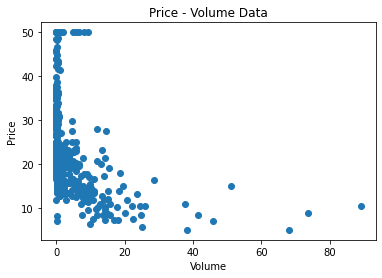

In [66]:
plt.scatter(dataset['crim'],dataset['medv'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price - Volume Data')

In [67]:
y_pred=regressor.predict(X_test)
print(y_pred)

[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 27.26856352 19.29492159 28.62304496 19.17978838 18.9

In [68]:
from sklearn.metrics import mean_squared_error
accuracy=100-mean_squared_error(Y_test, y_pred)
print("Accuracy of the traning modle is :",accuracy)

Accuracy of the traning modle is : 66.55102000232353


In [81]:
inp_arr=[]
for i in range(0,13):
    x=float(input())
    inp_arr.append(x)
out=regressor.predict([inp_arr])
print("price of new house is :",out[0],"K $")



0.00632
18
2.31
0
0.538
6.575
65.2
4.09
1
296
15.3
396.9
4.98
price of new house is : 30.499498364556224 K $
